<a href="https://colab.research.google.com/github/Parthsarthi-lab/Machine-Learning-Projects/blob/main/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

%matplotlib inline

In [ ]:
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
boston_x = pd.DataFrame(boston.data)
boston_y = pd.DataFrame(boston.target)
print(boston_x.head())
print(boston_y.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [ ]:
boston_x.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']

In [ ]:
boston_y.columns = ['PRICING']

In [ ]:
boston_price = pd.concat([boston_x,boston_y],axis=1)

In [ ]:
boston_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICING
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
##bs =  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
 #       'TAX', 'PTRATIO', 'B', 'LSTAT']
x = boston_price.drop('PRICING',axis=1)
y = boston_price['PRICING']

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [ ]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = lm.predict(xtest)
preds

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [ ]:
print('INTERCEPT',lm.intercept_)
print('\n\nCOEFFICINETS',lm.coef_)

print(boston_price.columns.values.tolist())
list(zip(boston_price.columns,lm.coef_))


INTERCEPT 31.63108403569163


COEFFICINETS [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICING']


[('CRIM', -0.1334701028529461),
 ('ZN', 0.03580891359323195),
 ('INDUS', 0.04952264522005543),
 ('CHAS', 3.119835116285394),
 ('NOX', -15.417060895306689),
 ('RM', 4.057199231645403),
 ('AGE', -0.010820835184926221),
 ('DIS', -1.3859982431608788),
 ('RAD', 0.24272733982224926),
 ('TAX', -0.00870223436566183),
 ('PTRATIO', -0.9106852081102881),
 ('B', 0.011794115892575632),
 ('LSTAT', -0.5471133128239569)]

### Evaluating coefficients and checking relationships

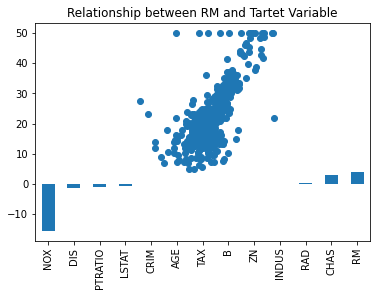

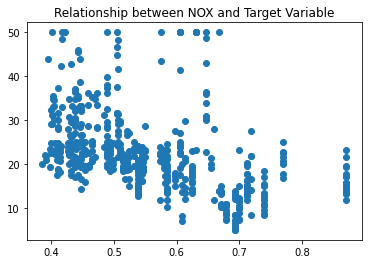

R2 Value/Coefficient of Determination: 0.7112260057484874


In [ ]:
predictors = boston_price.columns[:-1] # '-'gives all the rows

coef = pd.Series(lm.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

plt.scatter(boston_price.RM,boston_price.PRICING)
plt.title('Relationship between RM and Tartet Variable')
plt.show()

plt.scatter(boston_price.NOX,boston_price.PRICING)
plt.title('Relationship between NOX and Target Variable')
plt.show()

print('R2 Value/Coefficient of Determination: {}'.format(lm.score(xtest,ytest)))

### Final Prediction

4.748208239685937
4.638689926172868


,Actual,Predicted
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


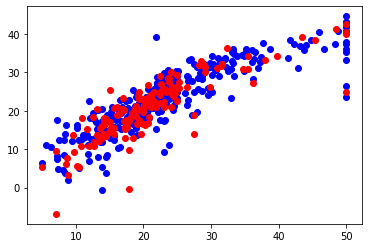

In [ ]:
plt.scatter(ytrain,lm.predict(xtrain),color='blue')
print(sqrt(mean_squared_error(ytrain,lm.predict(xtrain))))

plt.scatter(ytest,lm.predict(xtest),color='red')
print(sqrt(mean_squared_error(ytest,lm.predict(xtest))))

pd.DataFrame({'Actual':ytest,'Predicted':lm.predict(xtest)}).head(10)